In [ ]:
!pip install opencv-python mediapipe numpy pandas matplotlib seaborn

In [ ]:
import cv2
import mediapipe as mp

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
def mediapipe(frame, hands):
    frame = cv2.resize(cv2.flip(frame, 1), (640, 480))
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image, results

In [ ]:
capture = cv2.VideoCapture(0)

In [ ]:
with mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while capture.isOpened():
        ret, frame = capture.read()

        image, results = mediapipe(frame, hands)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, 
                    hand_landmarks, 
                    mp_hands.HAND_CONNECTIONS,
                )

        cv2.imshow("Hand Tracking", image)

        if cv2.waitKey(5) & 0xFF == 27:
            break

    capture.release()
    cv2.destroyAllWindows()

In [ ]:
results.multi_hand_landmarks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('Dataset/train_data.csv')

In [4]:
train.head()

,label,ver.x0,ver.y0,ver.z0,ver.x1,ver.y1,ver.z1,ver.x2,ver.y2,ver.z2,...,ver.z17,ver.x18,ver.y18,ver.z18,ver.x19,ver.y19,ver.z19,ver.x20,ver.y20,ver.z20
0,A,0.278411,0.695334,-6.762847e-07,0.200128,0.620533,-0.022475,0.142370,0.516582,-0.040151,...,-0.049513,0.365731,0.458294,-0.073240,0.357022,0.511900,-0.059459,0.346693,0.564412,-0.040863
1,A,0.579226,0.760085,-1.479179e-06,0.411217,0.680030,-0.040085,0.265983,0.565985,-0.118771,...,-0.242286,0.591494,0.576435,-0.280686,0.557463,0.594451,-0.267542,0.534894,0.644566,-0.263740
2,A,0.479878,0.789794,-1.101431e-06,0.379517,0.716278,-0.031272,0.307061,0.580528,-0.051447,...,-0.067705,0.580279,0.515611,-0.106108,0.559661,0.600459,-0.090427,0.554961,0.667288,-0.067013
3,A,0.475106,0.804069,-1.105380e-06,0.369806,0.720176,-0.034797,0.296779,0.589539,-0.059023,...,-0.075889,0.574916,0.524177,-0.114318,0.557065,0.611504,-0.097624,0.546631,0.681055,-0.074528
4,A,0.466990,0.802180,-1.071714e-06,0.365610,0.740132,-0.033263,0.292247,0.604434,-0.052462,...,-0.070841,0.566635,0.533698,-0.108298,0.545575,0.618803,-0.092145,0.540315,0.682023,-0.069202


In [5]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'space'], dtype=object)

<Axes: ylabel='count'>

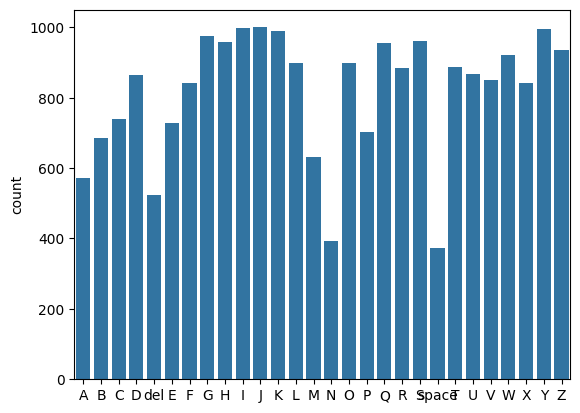

In [6]:
plt.figure()
sns.countplot(x = labels)